In [174]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib

In [175]:
matplotlib.style.use('publication')

In [176]:
((47.5/16)**(1/3) ) * 0.155

0.22276976180911218

In [177]:
sqrt(940**2 + 300**2)

986.7117106835208

In [178]:
(47.5/16)**0.25 

1.3126332671432939

In [179]:
from syntax_sugar import pipe, END
from syntax_sugar import thread_syntax as t, process_syntax as p

NTHR = 14

# Import data

In [180]:
mode = 'LO'

In [181]:
folder = 'output/TestL1'+mode+'_G=6.00L=0.500MG=1.60screen=0.060/'

In [182]:
folder = 'output/TestL1LO_G=15.00L=0.250MG=1.60screen=0.055/'

In [183]:
folder = r'output/TestL1LO_G=(12.00,14.00)L=0.250MQ=0.60MG=1.40screen=0.040/'

In [184]:
folder = r'output/TestL1LO_G=(15.00,16.00)L=0.200MQ=0.40MG=1.40screen=0.030/'

In [185]:
folder = 'output/TestL1LO_G=(12.00,12.00)L=0.250MQ=0.60MG=1.40screen=0.030/'

In [186]:
folder = 'output/TestTrangeL1LO_G=(12.00,12.00)L=0.250MQ=0.60MG=1.40screen=0.030/'

In [187]:
folder = 'output/TestL1LO_G=(32.00,32.00)L=0.100MQ=0.60MG=1.40screen=0.010/'

In [188]:
folder = 'output/SuppressGL1LO_G=(12.00,13.00)L=0.200MQ=0.60MG=1.80screen=0.000/'

In [189]:
folder = 'output/SuppressGL1HI_G=(13.00,14.00)L=0.200MQ=0.60MG=1.80screen=0.010/'

In [190]:
folder = 'output/SuppressGL1XHI_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.010/'

In [191]:
trange = array([0.16, 0.2, 0.3, 0.4, 0.5])

In [192]:
lmax = 1

In [193]:
pQs = []
pGs = []

ch_names_Q = ['qa1', 'qa8', 'qq3', 'qq6', 'qg3', 'qg6', 'qg15']
ch_names_G = ['gg1', 'gq3', 'gq6', 'gq15', 'gg16', 'gg27']

TMs_Q = []
TMs_G = []
Xs_Q = []
Xs_G = []
# Sigmas = []
SQs = []
SGs = []


for T in trange:
    qrange = np.loadtxt(folder + 'qrange_T=%.3f.dat'%T)
    erange = np.loadtxt(folder + 'erange_T=%.3f.dat'%T)
    Gtab_Q = np.loadtxt(folder + 'Q_G_T=%.3f.dat'%T, dtype=complex)
    
    Gtab_Q = 1/(1/Gtab_Q - 0*5e-2j)
    
    pQ = QuarkTM.Particle(0.6, qrange, erange, 
                         Gtab=Gtab_Q)
    pQs += [pQ]

    Gtab_G = np.loadtxt(folder + 'G_G_T=%.3f.dat'%T, dtype=complex)
    
    Gtab_G = 1/(1/Gtab_G - 0*5e-2j)
    
    pG = QuarkTM.Particle(1.4, qrange, erange, 
                         Gtab=Gtab_G, stat='b', d=16)
    pGs += [pG]
    
    
    SQ = np.loadtxt(folder + 'Q_S_T=%.3f.dat'%T, dtype=complex)
    
    SQs += [SQ]

    SG = np.loadtxt(folder + 'G_S_T=%.3f.dat'%T, dtype=complex)
    
    SGs += [SG]

    tmss_Q = []
    smss_Q = []
    xmss_Q = []

    for l in range(lmax + 1):
        tms_Q = dict()
        sms_Q = dict()
        xms_Q = dict()
        for ch in ch_names_Q:
    #         print(ch)
            _tm = np.loadtxt(folder + f'Q_TM_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            
            _x = np.loadtxt(folder + f'Q_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            tms_Q[ch] = _tm
            
    #         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
            # sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
            #         + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
            
            # sms[ch] = sigma
            xms_Q[ch] = _x
        tmss_Q += [tms_Q]
        xmss_Q += [xms_Q]

    tmss_G = []
    smss_G = []
    xmss_G = []

    

    for l in range(lmax + 1):
        tms_G = dict()
        sms_G = dict()
        xms_G = dict()
        for ch in ch_names_G:
    #         print(ch)
            
            _tm = np.loadtxt(folder + f'G_TM_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)

            # print(folder + f'G_X_{ch}_l=%i_T=%.3f.dat'%(l,T))
            _x = np.loadtxt(folder + f'G_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            tms_G[ch] = _tm
            
    #         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
            # sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
            #         + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
            
            # sms[ch] = sigma
            xms_G[ch] = _x.copy()
            # if ch == 'gg1':
            #     plt.plot(erange, _x[:, 0])

        tmss_G += [tms_G]
        xmss_G += [xms_G]

        # print(tmss_G[0]['gg1'][:, 0])
        # plt.plot(erange, xmss_G[-1]['gg1'][:, 0], ls='--')

    

    # plt.plot(erange, xmss_G[0]['gg1'][:, 0], ls=':')
    # plt.plot(erange, xmss_G[1]['gg1'][:, 0], ls=':')
    
    # break
        
    Xs_Q += [xmss_Q]
    TMs_Q += [tmss_Q]
    Xs_G += [xmss_G]
    TMs_G += [tmss_G]
    # Sigmas += [sms]

## Plots of everything

In [194]:
TMs_Q[0][0]

{'qa1': array([[-1.65634029e+03+1.88762055e-04j, -1.49345040e+03+1.70198580e-04j,
         -1.12299409e+03+1.27980146e-04j, ...,
         -1.07870533e-04+1.22932852e-11j, -1.01534525e-04+1.15712126e-11j,
         -9.56281233e-05+1.08980994e-11j],
        [-1.75012828e+03+2.47568976e-04j, -1.57801497e+03+2.23222238e-04j,
         -1.18658208e+03+1.67851074e-04j, ...,
         -1.13978554e-04+1.61231346e-11j, -1.07283778e-04+1.51761076e-11j,
         -1.01042934e-04+1.42932927e-11j],
        [-1.75051541e+03+2.93371272e-04j, -1.57836402e+03+2.64520187e-04j,
         -1.18684455e+03+1.98904902e-04j, ...,
         -1.14003766e-04+1.91060471e-11j, -1.07307509e-04+1.79838122e-11j,
         -1.01065285e-04+1.69376693e-11j],
        ...,
        [-1.48652259e+03-1.58542914e+01j, -1.34033312e+03-1.42951288e+01j,
         -1.00785816e+03-1.07491653e+01j, ...,
         -9.68110147e-05-1.03252386e-06j, -9.11246111e-05-9.71876347e-07j,
         -8.58237682e-05-9.15340974e-07j],
        [-1.48240365

In [195]:
irange = [0, 1, 3]

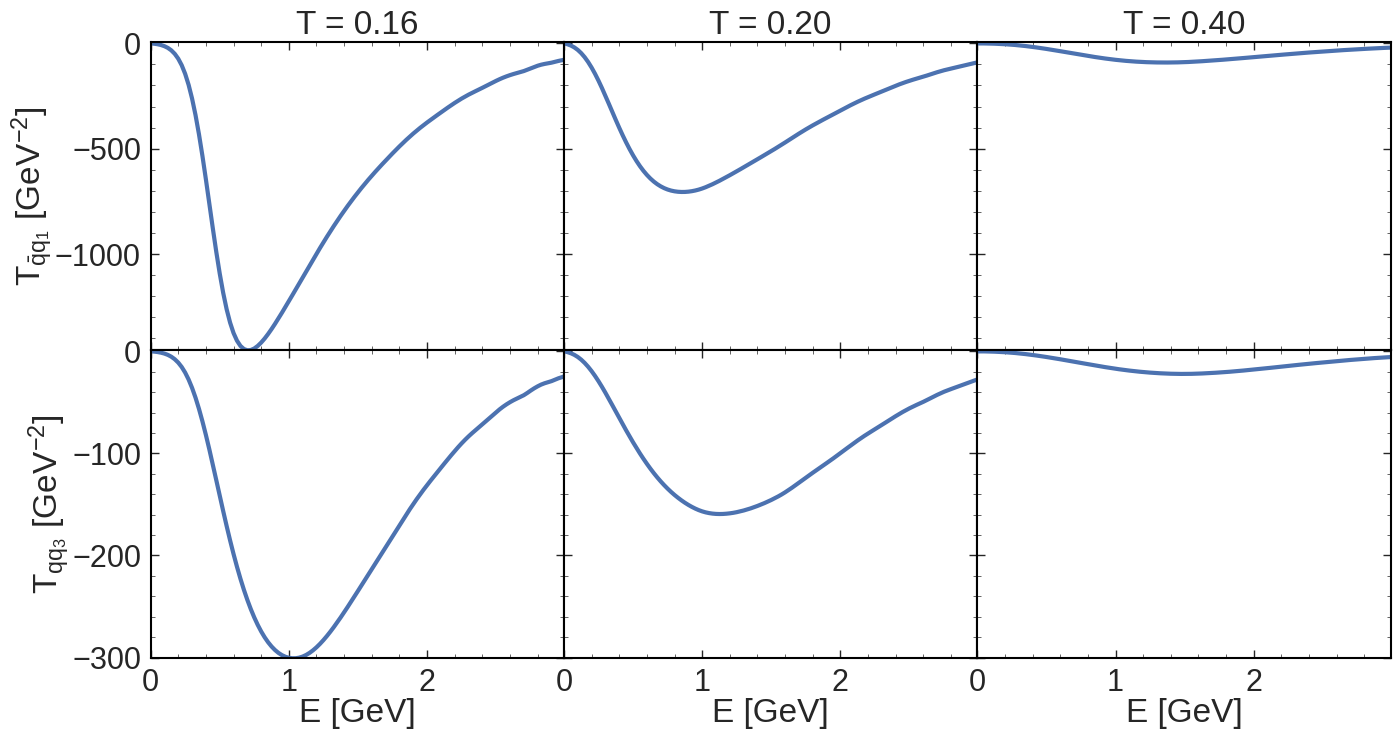

In [196]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(TMs_Q[i][0]['qa1'][:, 0]))
    ax[1][_i].plot(erange, imag(TMs_Q[i][0]['qq3'][:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(0, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'$T_{\bar q q_1}$ [GeV$^{-2}$]')
ax[1][0].set_ylabel(r'$T_{q q_3}$ [GeV$^{-2}$]')

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(folder + 'T_Q_l0.pdf', bbox_inches='tight')

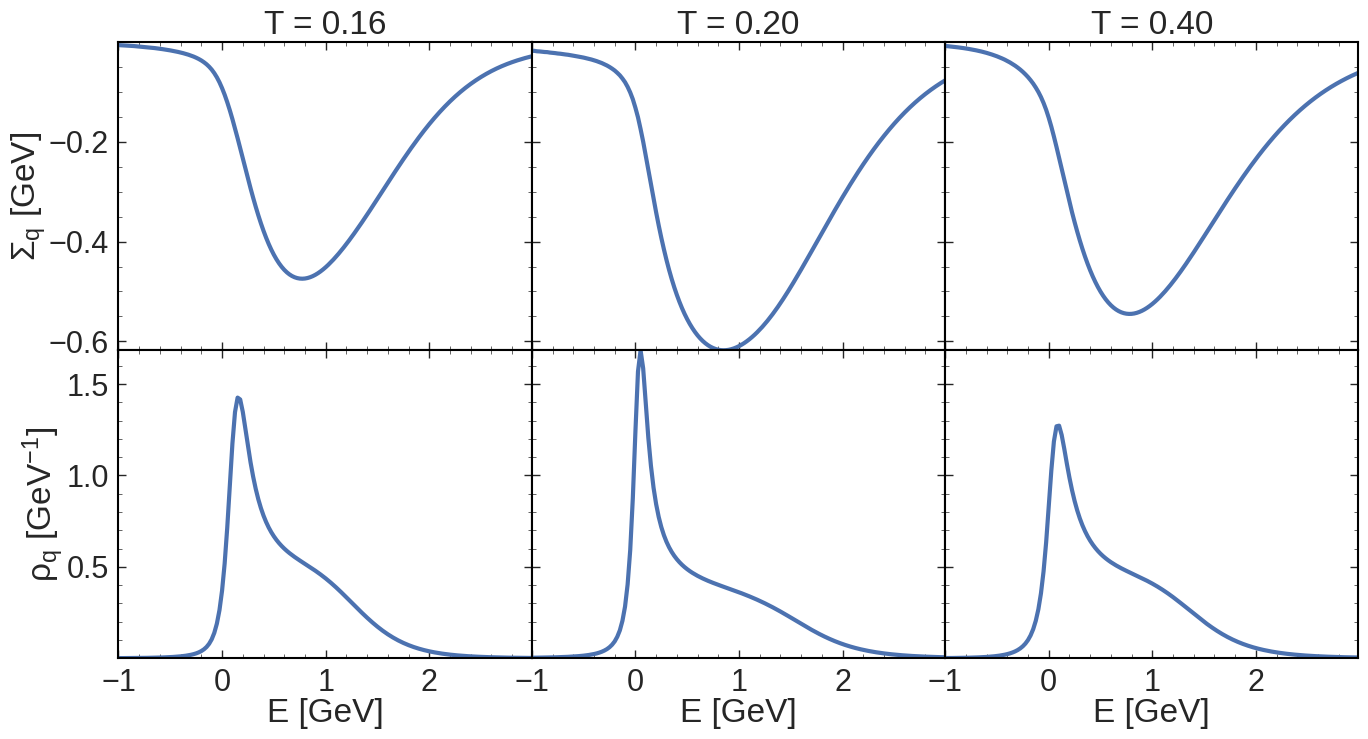

In [197]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(SQs[i][:, 0]))
    ax[1][_i].plot(erange, (pQs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{q}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')
plt.savefig(folder + 'S_Rho_Q.pdf', bbox_inches='tight')

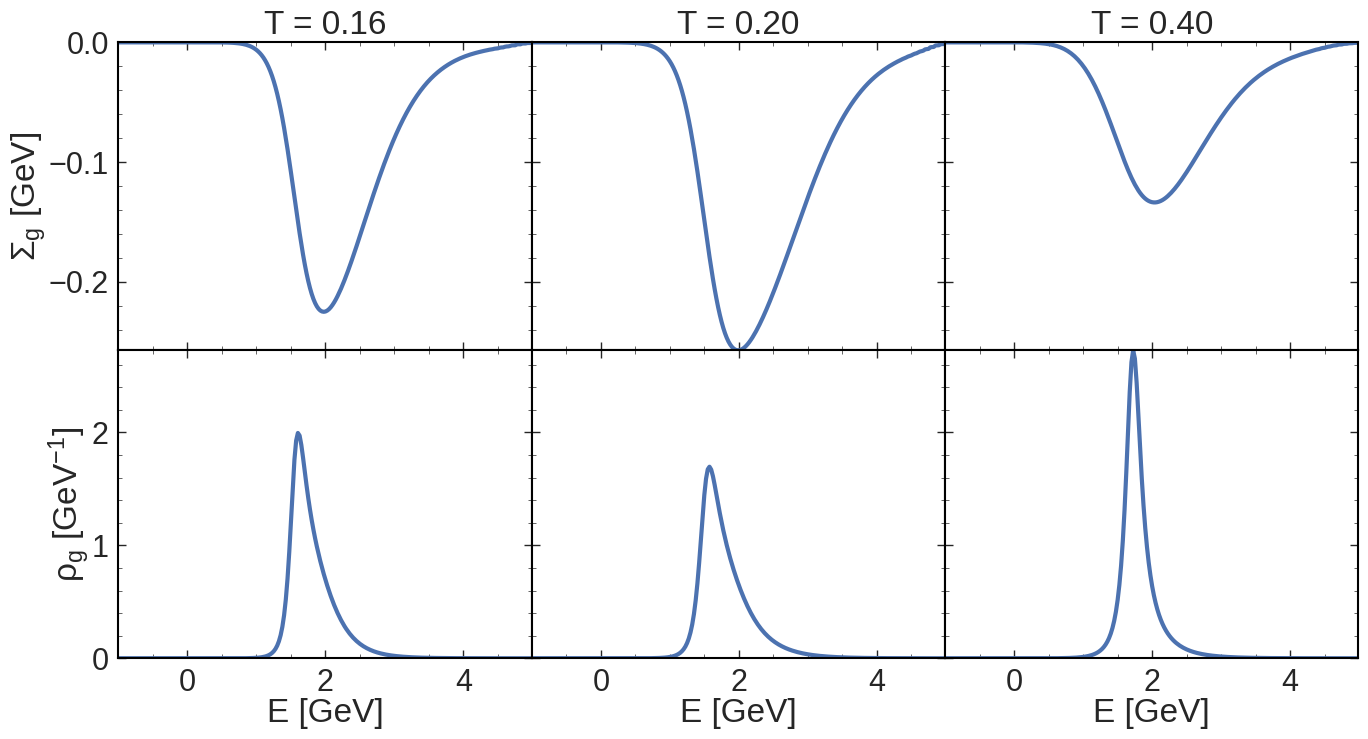

In [198]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(SGs[i][:, 0]))
    ax[1][_i].plot(erange, (pGs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 4.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{g}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_g$ [GeV$^{-1}$]')

plt.savefig(folder + 'S_Rho_G.pdf', bbox_inches='tight')

# Quasiparticle pressure

In [199]:
ps_Q = array([tm.OmQ_F(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pQs)])

In [200]:
ps_G = array([tm.OmQ_B(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pGs)])

In [201]:
from scipy.integrate import quad

Pfree_Q = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])
Pfree_G = array([quad(lambda z: -z*z*T*log(1 - exp(-sqrt(1.8**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])

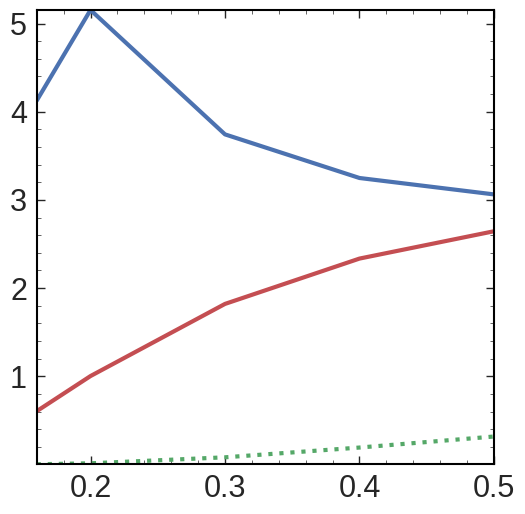

In [202]:
plt.plot(trange, 3*3*2*2*ps_Q/trange**4)
plt.plot(trange, 8*2*ps_G/trange**4, ls=':')

plt.plot(trange, 3*3*2*2*Pfree_Q/trange**4)

# Self-energy pressure 

In [203]:
ps_S_Q = []
ps_S_G = []

# ps_S2 = []

for T, pt, sig_tot in zip(trange, pQs, SQs):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
#     print(T)
    ps_S_Q += [tm.OmS_F(T, iImG, iReG, iImS, iReS)]

for T, pt, sig_tot in zip(trange, pGs, SGs):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
#     print(T)
    ps_S_G += [tm.OmS_B(T, iImG, iReG, iImS, iReS)]
#     ps_S2 += [tm.OmS2_F(T, iImG, iReG, iImS, iReS)]
ps_S_Q = array(ps_S_Q)
ps_S_G = array(ps_S_G)

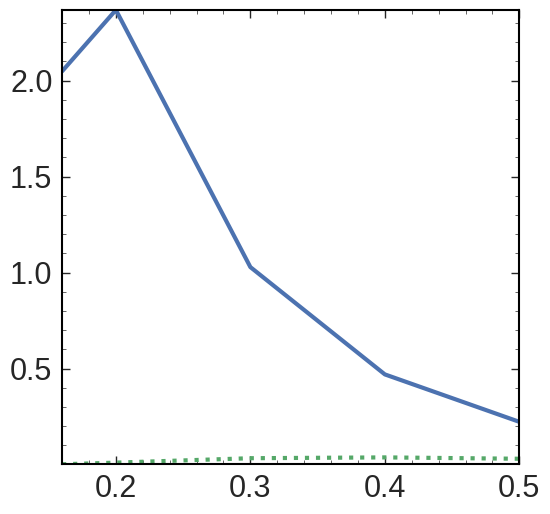

In [204]:
plt.plot(trange, 3*3*2*ps_S_Q/trange**4)
plt.plot(trange, 8*2*ps_S_G/trange**4, ls=':')

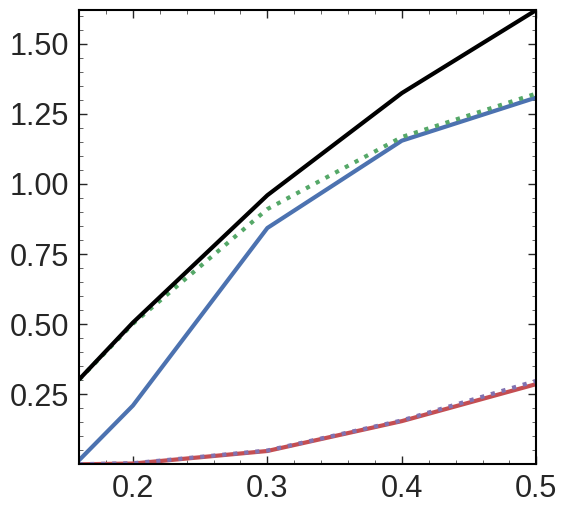

In [205]:
plt.plot(trange, 3*3*2*(ps_Q - ps_S_Q)/trange**4)
plt.plot(trange, 3*3*2*Pfree_Q/trange**4, ls=':')
plt.plot(trange, 8*2*(ps_G - ps_S_G)/trange**4)
plt.plot(trange, 8*2*Pfree_G/trange**4, ls=':')
plt.plot(trange, 8*2*Pfree_G/trange**4 + 3*3*2*Pfree_Q/trange**4, c='black')

# $\Phi$ pressure

In [206]:
NFS = {
    'qa1' : 3, 'qa8' : 3, 'qq3' : 3, 'qq6' : 3, 'qg3' : 1, 'qg6' : 1, 'qg15' : 1,
    'gq3' : 3, 'gq6' : 3, 'gq15' : 3, 'gg1' : 1, 'gg16' : 1, 'gg27' : 1
}

## Quarks

In [207]:
keys_QQ = ['qa1', 'qa8', 'qq3', 'qq6']

keys_QG = ['qg3', 'qg6', 'qg15']

In [208]:
lmax = 1

In [209]:
Phis_Q = []

LTs_QQ = dict()
LTs_QG = dict()
Vs = dict()

LSs_QQ = []
LSs_QG = []

for i, T in enumerate(trange[:]):

    xmss_Q = Xs_Q[i]
    LT_QQ = 0
    LT_QG = 0
    
    for k in keys_QQ:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        print(k, ds, da, Fa, NFS[k])

        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_Q[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            LT_QQ += _lt
            lts += [_lt]
        LTs_QQ[k] = lts

    for k in keys_QG:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_Q[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            LT_QG += _lt
            lts += [_lt]
        LTs_QG[k] = lts

    # xms = Xs_Q[i]
    # tms = TMs_Q[i]

    
    # for k, x in xmss_Q[0].items():
    #     # x = xms[k]
    #     # if k == 'qq3':
    #     # print(NFS[k])
    #     ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
    #     v = np.loadtxt(folder + f'{k}_vq_T=%.3f.dat'%T)
    #     Vs[k] = v
    #     print(k, ds, da, Fa, NFS[k])
    #     lt = sign(v[0])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
    #     if k in keys_QQ:
    #         LT_QQ += lt
    #         LTs_QQ[k] = lt
    #     elif k in keys_QG:
    #         LT_QG += lt
    #         LTs_QG[k] = lt
    #     else:
    #         pass

    # break
    ImSTs = []
    ReSTs = []
    for LT, func, p2 in zip([LT_QQ, LT_QG], [tm.sigma_ff_onshell, tm.sigma_fb_onshell], [pQs[i], pGs[i]]):
        iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(LT)))
        #pipe(ch.erange) | p[lambda z: ch.func(z, q, ch.T, ch.iImT, ch.p_j.R)]*(NTHR//1) | END

        iEps1 = tm.Interpolator(qrange, pQs[i].om0(qrange), 'linear')
        iEps2 = tm.Interpolator(qrange, p2.om0(qrange), 'linear')
        
        ST = array([
            pipe(erange) | p[lambda z: func(z, q, trange[i], iImLT, p2.R, 
                                           iEps1, iEps2)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])
    
        ST = ST.transpose()
    
        ReST = []
    
        for res in (ST.transpose()):
            iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
            ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
            ReST += [ReSigma]

        ReST = np.array(ReST).transpose()

        ImSTs += [ST]
        ReSTs += [ReST]

    iImST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ImSTs, axis=0)))
    iReST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ReSTs, axis=0)))

    LSs_QQ += [1j*ST + ReST]
    
    pt = pQs[i]

    Phi = 0.5 * tm.OmS_F(trange[i], pt.iImG, pt.iReG, iImST, iReST)
    Phis_Q += [Phi]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [210]:
len(LSs_QQ)

5

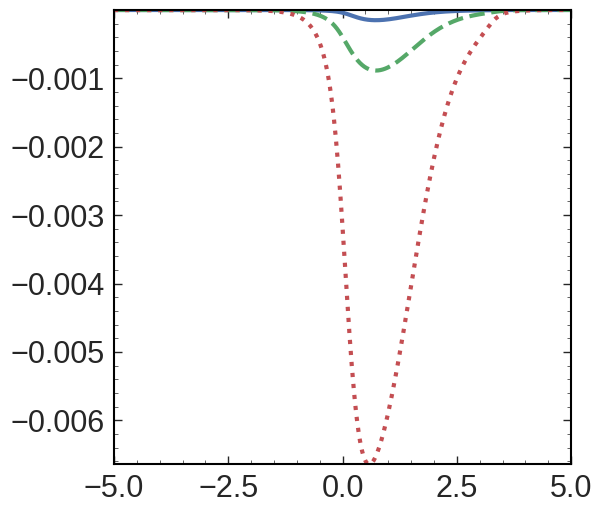

In [211]:
plt.plot(erange, imag(LSs_QQ[0][:, 0]))
plt.plot(erange, imag(LSs_QQ[1][:, 0]), ls='--')
plt.plot(erange, imag(LSs_QQ[2][:, 0]), ls=':')

In [212]:
LTs_QQ

{'qa1': [array([[-4.15025363e+02+1.38847047e-06j, -3.98095093e+02+1.33183012e-06j,
          -3.52660348e+02+1.17982785e-06j, ...,
          -2.14096920e-04+7.16262856e-13j, -2.01552345e-04+6.74294883e-13j,
          -1.89855983e-04+6.35164618e-13j],
         [-4.18151129e+02+1.72806762e-06j, -4.01093349e+02+1.65757397e-06j,
          -3.55316413e+02+1.46839442e-06j, ...,
          -2.15709393e-04+8.91449026e-13j, -2.03070338e-04+8.39216374e-13j,
          -1.91285885e-04+7.90515487e-13j],
         [-4.18162913e+02+2.11963715e-06j, -4.01104652e+02+2.03317007e-06j,
          -3.55326425e+02+1.80112360e-06j, ...,
          -2.15715472e-04+1.09344591e-12j, -2.03076060e-04+1.02937766e-12j,
          -1.91291275e-04+9.69641451e-13j],
         ...,
         [-4.06937933e+02-6.92775059e-01j, -3.90337576e+02-6.64514452e-01j,
          -3.45788200e+02-5.88673165e-01j, ...,
          -2.09924901e-04-3.57378175e-07j, -1.97624776e-04-3.36438324e-07j,
          -1.86156337e-04-3.16914342e-07j],
   

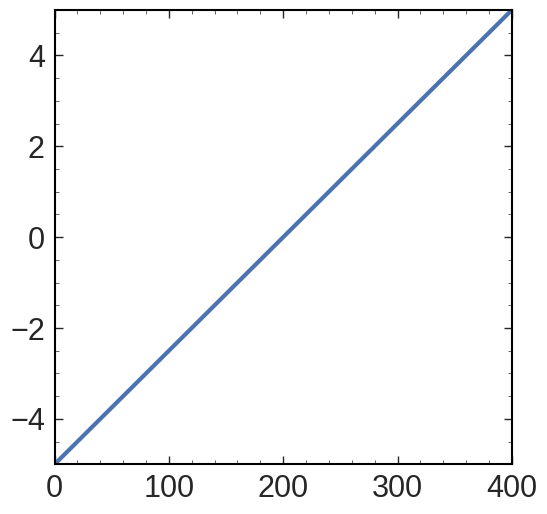

In [213]:
plt.plot(erange, )

In [214]:
keys_GG = ['gg1', 'gg16', 'gg27']
keys_GQ = ['gq3', 'gq6', 'gq15']

In [215]:
Phis_G = []

LTs_GG = dict()
LTs_GQ = dict()
Vs = dict()

LSs_GG = []
LSs_GQ = []

for i, T in enumerate(trange[:]):
    LT_GG = 0
    LT_GQ = 0
    xmss_G = Xs_G[i]

    for k in keys_GG:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            # print(l)
            xms = xmss_G[l]
            x = xms[k]
            # plt.plot(erange, x[:, 0])
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 16 * v**2 / x * log(1 - x)
            LT_GG += _lt
            lts += [_lt]
        LTs_GG[k] = lts
    #     break
    # break
    for k in keys_GQ:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_G[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 16 * v**2 / x * log(1 - x)
            LT_GQ += _lt
            lts += [_lt]
        LTs_GQ[k] = lts

    # break
    # xms = Xs_G[i]
    # tms = TMs_G[i]
    
    # for k, x in xms.items():
    #     # x = xms[k]
    #     # if k == 'qq3':
    #     # print(NFS[k])
    #     ds, da, Fa = np.loadtxt(folder + f'{k}_weights')

    #     #### adding the p-wave

    #     lt = 0

    #     for l in range(lmax + 1):
    #         v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
    #         Vs[k] = v
    #         print(k, ds, da, Fa)
    #         lt += sign(v[0])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            
    #     if k in keys_GG:
    #         LT_GG += lt
    #         LTs_GG[k] = lt 
    #     elif k in keys_GQ:
    #         LT_GQ += lt
    #         LTs_GQ[k] = lt 
    #     else:
    #         pass

    # break
    ImSTs = []
    ReSTs = []
    for LT, func, p2 in zip([LT_GG, LT_GQ], [tm.sigma_bb_onshell, tm.sigma_bf_onshell], [pGs[i], pQs[i]]):
        iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(LT)))
        #pipe(ch.erange) | p[lambda z: ch.func(z, q, ch.T, ch.iImT, ch.p_j.R)]*(NTHR//1) | END

        iEps1 = tm.Interpolator(qrange, pGs[i].om0(qrange), 'linear')
        iEps2 = tm.Interpolator(qrange, p2.om0(qrange), 'linear')
        
        ST = array([
            pipe(erange) | p[lambda z: func(z, q, trange[i], iImLT, p2.R, iEps1, iEps2)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])
    
        ST = ST.transpose()
    
        ReST = []
    
        for res in (ST.transpose()):
            iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
            ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
            ReST += [ReSigma]

        ReST = np.array(ReST).transpose()

        ImSTs += [ST]
        ReSTs += [ReST]

    iImST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ImSTs, axis=0)))
    iReST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ReSTs, axis=0)))

    LSs_GG += [1j*ST + ReST]
    
    pt = pGs[i]

    Phi = 0.5 * tm.OmS_B(trange[i], pt.iImG, pt.iReG, iImST, iReST)
    Phis_G += [Phi]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [216]:
matplotlib.style.use('publication')

In [217]:
Phis_G

[1.0099025185053672e-08,
 1.2965866426938486e-07,
 2.1746974709966935e-06,
 7.895122385639986e-06,
 1.603266262240456e-05]

In [218]:
Phis_Q

[1.786792336895178e-05,
 5.248096932369337e-05,
 0.00011457721787916305,
 0.0001648081033716716,
 0.00019271936517298923]

In [219]:
Phis_Q

[1.786792336895178e-05,
 5.248096932369337e-05,
 0.00011457721787916305,
 0.0001648081033716716,
 0.00019271936517298923]

In [220]:
Phis_Q

[1.786792336895178e-05,
 5.248096932369337e-05,
 0.00011457721787916305,
 0.0001648081033716716,
 0.00019271936517298923]

In [221]:
i = 0

In [222]:
Phis_Q = array(Phis_Q)

In [223]:
Phis_G = array(Phis_G)

In [224]:
Phis_Q

array([1.78679234e-05, 5.24809693e-05, 1.14577218e-04, 1.64808103e-04,
       1.92719365e-04])

In [225]:
import matplotlib
matplotlib.style.use('publication')

In [226]:
import pandas as pd

In [227]:
lat = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2018/PT.csv')

Get the contributions to pressure

In [228]:
Nc = 3
Nf = 3
Ns = 2
Na = 2

In [229]:
P_QP_G = (Nc**2 - 1) * Ns * (ps_G - ps_S_G)
P_QP_Q = Nc * Nf * Ns * Na * (ps_Q - ps_S_Q)

P_Q_G = (Nc**2 - 1) * Ns * (ps_G)
P_Q_Q = Nc * Nf * Ns * Na * (ps_Q)

P_S_G = (Nc**2 - 1) * Ns * (- ps_S_G)
P_S_Q = Nc * Nf * Ns * Na * (- ps_S_Q)

P_Phi_Q = Nc * Nf * Ns * Na * Phis_Q 
P_Phi_G = (Nc**2 - 1) * Ns * Phis_G 

P_Phi = P_Phi_G + P_Phi_Q

P_tot = P_QP_G + P_QP_Q + P_Phi

Text(47.02777777777777, 0.5, 'P/T$^4$')

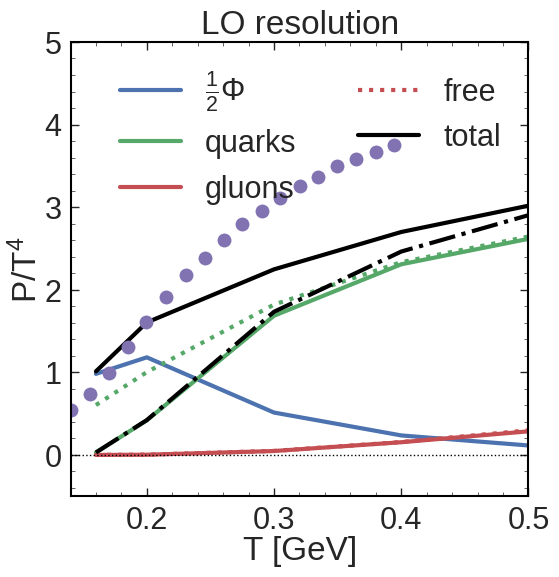

In [230]:
lp, = plt.plot(trange, P_Phi/trange**4, label=r'$\frac{1}{ 2 }\Phi$')
# plt.plot(trange, P_phi_tot_1, label=r'$\frac{1}{ 2 }\Phi$ L=1', c=lp.get_c(), ls='--')

# plt.plot(trange, 8*2*Phis_G/trange**4 / 2)
lQ, = plt.plot(trange, P_QP_Q/trange**4, label='quarks')
plt.plot(trange, 3*3*2*2*Pfree_Q/trange**4, ls=':', c=lQ.get_c())
lG, = plt.plot(trange, P_QP_G/trange**4, label='gluons')
plt.plot(trange, 8*2*Pfree_G/trange**4, ls=':', c=lG.get_c(), label='free')

plt.plot(trange, (P_QP_Q + P_QP_G)/trange**4, ls='-.', c='black')
plt.plot(trange, P_tot/trange**4, c='black', label='total')
# plt.plot(trange, )

plt.title(mode + ' resolution')
plt.ylim(-0.5, 5)
plt.legend(ncol=2)

plt.plot(lat.x, lat.PT_lat, ls='none', marker='o')

plt.axhline(0, lw=1, ls=':', c='black')

plt.savefig(folder + 'PT_swave_'+mode+'.pdf', bbox_inches='tight')

plt.xlabel('T [GeV]')
plt.ylabel(r'P/T$^4$')

In [120]:
df_P = pd.DataFrame(array([trange, P_tot, P_Q_Q, P_Q_G, P_S_Q, P_S_G, P_Phi, P_Phi_Q, P_Phi_G]).transpose(), 
               columns=['T', 'Ptot', 'P_Q_Q', 'P_Q_G', 'P_S_Q', 'P_S_G', 'P_Phi', 'P_Phi_Q', 'P_Phi_G'])

In [121]:
df_P

,T,Ptot,P_Q_Q,P_Q_G,P_S_Q,P_S_G,P_Phi,P_Phi_Q,P_Phi_G
0,0.16,0.000638,0.002076,0.000001,-0.001877,-9.445804e-07,0.000439,0.000438,1.140765e-07
1,0.20,0.002454,0.006941,0.000019,-0.005917,-1.339523e-05,0.001424,0.001423,1.619542e-06
2,0.30,0.018192,0.028831,0.000629,-0.014661,-2.353784e-04,0.003628,0.003599,2.985658e-05
3,0.40,0.069248,0.081347,0.004824,-0.021498,-8.484759e-04,0.005424,0.005313,1.108553e-04
4,0.50,0.189136,0.189512,0.019659,-0.024758,-1.691590e-03,0.006415,0.006189,2.263303e-04


In [122]:
df_P.to_csv(folder + 'pressure.csv')

## Plotting the integrands

LogSigma plots

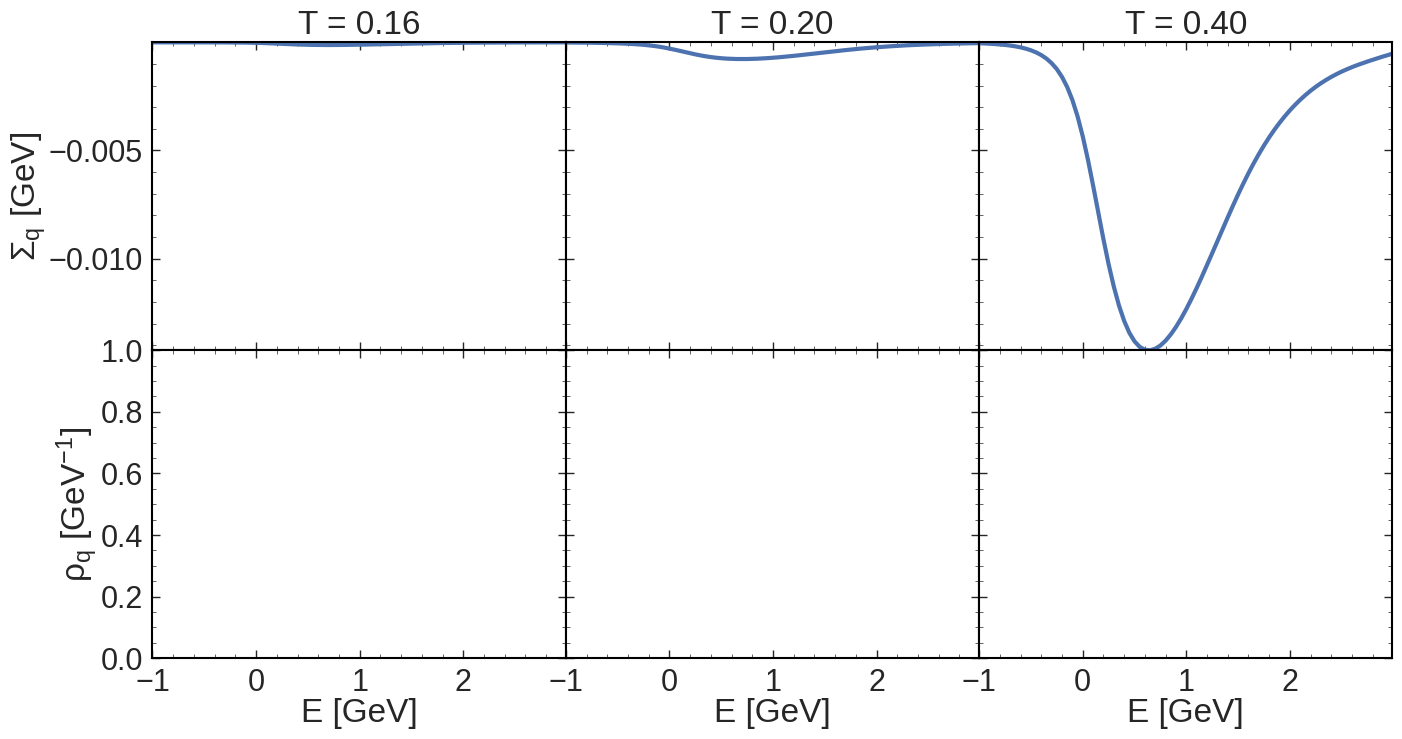

In [123]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(LSs_QQ[i][:, 0]))
    # ax[1][_i].plot(erange, (pQs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{q}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')
plt.savefig(folder + 'LogS_Rho_Q.pdf', bbox_inches='tight')